In this notebook we will use our Car price data set, only deference will be that we'll play with our features a little bit.

In [1]:
# First we will upload elementary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #to encode categorical values

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Then comes the data, we're making copy of our original data set and work with it
df1=pd.read_csv("CarPrice.csv")
dfcars=df1.copy()

In [3]:
#Let's just base it on the company name, not the car model, split the CarName column and transform it into CompanyName

CarBrand = dfcars['CarName'].apply(lambda x : x.split(' ')[0])
dfcars.insert(3,"CarBrand",CarBrand)
dfcars.drop(['CarName'],axis=1,inplace=True)
dfcars.head()

,car_ID,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# As mentioned in previous notebook, since citympg and highwaympg are so strongly correlated and when you think about it logically these 2 variables 
# are both related to the car's fuel economy and how many mpg the car can drive.
    
# I will combine these 2 variables into one by taking the adding the values and dividing by 2. 
# This will give a rough "average mpg".

dfcars["avgmpg"] = (dfcars["citympg"]+dfcars["highwaympg"])/2
dfcars["avgmpg"].head(5)

0    24.0
1    24.0
2    22.5
3    27.0
4    20.0
Name: avgmpg, dtype: float64

In [5]:
df3=dfcars['price']
df3.value_counts(ascending = False)

5572.0     2
6692.0     2
7957.0     2
7898.0     2
6229.0     2
          ..
6377.0     1
30760.0    1
16925.0    1
15998.0    1
18920.0    1
Name: price, Length: 189, dtype: int64

In [6]:
# Let's deal with the price range per manufacturer, we will divide the car into 4 categories, Cheap, Affordable, Expensive and Luxury

dfcars["CarBrand"] = dfcars['price'].apply(lambda x : "Cheap" if x < 10000 
                                                     else ("Affordable" if 10000 <= x < 15000
                                                           else ('Expensive' if 15000 <= x < 25000 
                                                           else ("Luxury"))))

In [7]:
type(dfcars["symboling"])

pandas.core.series.Series

In [8]:
#Symboling refers to the category of insurance, let's put it that way and divide it into cars assessed at high risk, low risk and no risk

dfcars["symboling"]=dfcars["symboling"].apply(lambda x : "No risk" if x >= -3 & x <= -1
                                         else ("Low risk" if x>=0 and x <= 1
                                            else ("High risk")))

In [9]:
# As the feature cylinder numer is essentially numerical, we will map it to the numerical values of its string meaning.
dfcars['cylindernumber'] = dfcars['cylindernumber'].map({'two':2, 'three': 3,'four': 4, 
                                                             'five': 5,'six': 6,'eight': 8,'twelve':12})

In [10]:
# Next we will use Label Encoder on some of our categorical features
le = LabelEncoder()
dfcars['fueltype'] = le.fit(dfcars['fueltype']).transform(dfcars['fueltype'])
dfcars['aspiration'] = le.fit(dfcars['aspiration']).transform(dfcars['aspiration'])
dfcars['doornumber'] = le.fit(dfcars['doornumber']).transform(dfcars['doornumber'])
dfcars['enginelocation'] = le.fit(dfcars['enginelocation']).transform(dfcars['enginelocation'])

In [11]:
# Let take a look of our data set, with all this changes
dfcars.head(3)

,car_ID,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avgmpg
0,1,High risk,Affordable,1,0,1,convertible,rwd,0,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,24.0
1,2,High risk,Expensive,1,0,1,convertible,rwd,0,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,24.0
2,3,Low risk,Expensive,1,0,1,hatchback,rwd,0,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.5


In [12]:
dfcars.columns

Index(['car_ID', 'symboling', 'CarBrand', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'avgmpg'],
      dtype='object')

In [13]:
# So, in this version, we will only use variables that show us a certain influence on the price, 
# therefore, we reject Car Id, height, degree of compression,peakrpm speed, stroke, number of doors, location of the engine, highwaympg and citympg since we have avgmpg

df= dfcars[['symboling', 'CarBrand', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower',
       'avgmpg','price']]
df.head(3)

,symboling,CarBrand,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,avgmpg,price
0,High risk,Affordable,1,0,convertible,rwd,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,24.0,13495.0
1,High risk,Expensive,1,0,convertible,rwd,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,24.0,16500.0
2,Low risk,Expensive,1,0,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,6,152,mpfi,2.68,154,22.5,16500.0


In [14]:
df.shape # Let us see shape of df

(205, 18)

In [15]:
df.describe() # Describing our modified dataset

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,avgmpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.902439,0.180488,98.756585,174.049268,65.907805,2555.565854,4.380488,126.907317,3.329756,104.117073,27.985366,13276.710571
std,0.297446,0.385535,6.021776,12.337289,2.145204,520.680204,1.080854,41.642693,0.270844,39.544167,6.666038,7988.852332
min,0.000000,0.000000,86.600000,141.100000,60.300000,1488.000000,2.000000,61.000000,2.540000,48.000000,15.000000,5118.000000
25%,1.000000,0.000000,94.500000,166.300000,64.100000,2145.000000,4.000000,97.000000,3.150000,70.000000,22.500000,7788.000000
50%,1.000000,0.000000,97.000000,173.200000,65.500000,2414.000000,4.000000,120.000000,3.310000,95.000000,27.000000,10295.000000
75%,1.000000,0.000000,102.400000,183.100000,66.900000,2935.000000,4.000000,141.000000,3.580000,116.000000,32.000000,16503.000000
max,1.000000,1.000000,120.900000,208.100000,72.300000,4066.000000,12.000000,326.000000,3.940000,288.000000,51.500000,45400.000000


In [16]:
dfcars.isnull().sum() # Routine check for NAN values

car_ID              0
symboling           0
CarBrand            0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
avgmpg              0
dtype: int64

(12.5, -0.5)

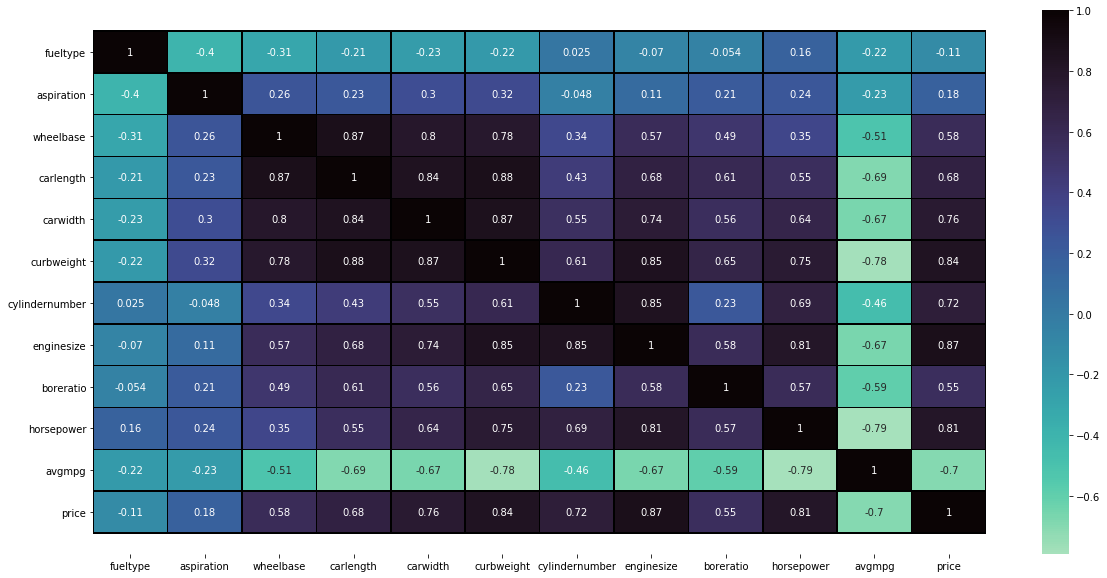

In [17]:
# correlation 
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.corr(), annot=True, cmap='mako_r',annot_kws={'size': 10},
                linecolor='black', center=False,  linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

Now our correlation matrix is balanced colored :)

In [18]:
# Transform categorical features using OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown= 'ignore')
ohe.fit(df.loc[:, ['CarBrand','carbody','symboling','drivewheel','enginetype','fuelsystem']])

df_enc = pd.DataFrame(ohe.transform(df.loc[:, ['CarBrand','symboling','carbody','drivewheel','enginetype','fuelsystem']]).toarray(), columns=ohe.get_feature_names())
df_enc.head(3)

,x0_Affordable,x0_Cheap,x0_Expensive,x0_Luxury,x1_convertible,x1_hardtop,x1_hatchback,x1_sedan,x1_wagon,x2_High risk,...,x4_ohcv,x4_rotor,x5_1bbl,x5_2bbl,x5_4bbl,x5_idi,x5_mfi,x5_mpfi,x5_spdi,x5_spfi
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
#Let's merge those two dataset and drop all features on which we applied OHE, we will get our ML data frame

df_ml2=pd.concat([df.drop(['CarBrand','symboling','carbody','drivewheel','enginetype','fuelsystem'], axis=1),df_enc], axis=1)
df_ml2.head(3)

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,...,x4_ohcv,x4_rotor,x5_1bbl,x5_2bbl,x5_4bbl,x5_idi,x5_mfi,x5_mpfi,x5_spdi,x5_spfi
0,1,0,88.6,168.8,64.1,2548,4,130,3.47,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,88.6,168.8,64.1,2548,4,130,3.47,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,94.5,171.2,65.5,2823,6,152,2.68,154,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
# We divide the data set into X and y, y contain only dependent feature, and X contain all independent features
X = df_ml2.drop(['price'], axis=1)
y = df_ml2['price']
# Show me X, show me y
display(X.head(3))
display(y)

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,...,x4_ohcv,x4_rotor,x5_1bbl,x5_2bbl,x5_4bbl,x5_idi,x5_mfi,x5_mpfi,x5_spdi,x5_spfi
0,1,0,88.6,168.8,64.1,2548,4,130,3.47,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,88.6,168.8,64.1,2548,4,130,3.47,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,94.5,171.2,65.5,2823,6,152,2.68,154,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [21]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1, random_state=0)

In [22]:
# Let us see the ratio between the divided training and test set
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (184, 41)
y_train shape: (184,)
X_test shape: (21, 41)
y_test shape: (21,)


In [23]:
# We will normalize data just in case, we'll try our data without any transformation, then normalized and standardized
# So let's normalize the data and leave it here for now

from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)
col_names = list(X.columns)
# Let's take a peek of norm data
df_norm = pd.DataFrame(data = X_train_norm, columns = col_names)
df_norm.head(3)

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,...,x4_ohcv,x4_rotor,x5_1bbl,x5_2bbl,x5_4bbl,x5_idi,x5_mfi,x5_mpfi,x5_spdi,x5_spfi
0,1.0,0.0,0.620991,0.662992,0.647059,0.578836,0.2,0.195312,0.657143,0.204762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.276968,0.507087,0.470588,0.317467,0.2,0.242188,0.657143,0.180952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.344023,0.497638,0.372549,0.425414,0.2,0.296875,0.771429,0.304762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
# Second we will standardize data, same case as with normilization
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
col_names = list(X.columns)
df_std = pd.DataFrame(data = X_train_std, columns = col_names)
df_std.head(3)

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,...,x4_ohcv,x4_rotor,x5_1bbl,x5_2bbl,x5_4bbl,x5_idi,x5_mfi,x5_mpfi,x5_spdi,x5_spfi
0,0.33934,-0.493197,1.457095,0.993073,1.177703,0.964918,-0.353447,-0.179363,0.448346,-0.238534,...,-0.264135,-0.128742,-0.226779,-0.695608,-0.104828,-0.33934,-0.073922,1.091089,-0.213201,-0.073922
1,0.33934,-0.493197,-0.463175,0.183902,0.316654,-0.210079,-0.353447,0.105964,0.448346,-0.370099,...,-0.264135,-0.128742,-0.226779,-0.695608,-0.104828,-0.33934,-0.073922,1.091089,-0.213201,-0.073922
2,0.33934,-0.493197,-0.088885,0.134862,-0.161707,0.275204,-0.353447,0.438844,1.040510,0.314041,...,-0.264135,-0.128742,-0.226779,-0.695608,-0.104828,-0.33934,-0.073922,1.091089,-0.213201,-0.073922


In [25]:
# Import metrics aka mean_squere_error, mean_absolute_error and R2 score

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [26]:
# Create a dictionary for each error where you will save the results
MSE = {}
MAE = {}
RMSE={}
R2={}

In [27]:
# Create a funcion to iterate trough model

def models(model, X_train, y_train, X_test, y_test, model_name):
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    MSE[model_name] = mean_squared_error(y_test, y_pred)
    print(f"Mean_squared_error of {model_name}: {MSE[model_name]}\n")
    RMSE[model_name]=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print(f'RMSE of {model_name}: {RMSE[model_name]}\n')
    MAE[model_name]=mean_absolute_error(y_test,y_pred)              
    print(f'Mean_absolute_error of {model_name}: {MAE[model_name]}\n')
    R2[model_name]=r2_score(y_test, y_pred)
    print(f'R2 score of {model_name} : {R2[model_name]}\n')
    return model, y_pred

In [28]:
# we will first try a model with non-normalized/standardized data

In [29]:
# First model Linear Regression
from sklearn.linear_model import LinearRegression

Lin_reg = LinearRegression()
model1 = models(Lin_reg, X_train, y_train, X_test, y_test, 'Lin_reg')

Mean_squared_error of Lin_reg: 2812764.7687872024

RMSE of Lin_reg: 1677.129920067972

Mean_absolute_error of Lin_reg: 1353.3482142857142

R2 score of Lin_reg : 0.9295876478387102



In [30]:
# Second model SVC kernel linear
from sklearn.svm import SVR, LinearSVR

Svr_linear = SVR(kernel='linear', C=1)
model2 = models(Svr_linear, X_train, y_train, X_test, y_test, 'Svr_linear')

Mean_squared_error of Svr_linear: 8710747.67548912

RMSE of Svr_linear: 2951.397580043922

Mean_absolute_error of Svr_linear: 2471.194555162658

R2 score of Svr_linear : 0.7819425784477754



In [31]:
# Third model SVR_rbf

SVR_rbf = SVR(kernel='rbf', C=100)
model3 = models(SVR_rbf, X_train_std, y_train, X_test_std, y_test, 'SVR_rbf')

Mean_squared_error of SVR_rbf: 29307900.018188454

RMSE of SVR_rbf: 5413.6771254100895

Mean_absolute_error of SVR_rbf: 3560.707726821511

R2 score of SVR_rbf : 0.2663310490488153



In [32]:
# Forth model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

Ran_for_reg = RandomForestRegressor(random_state=0)
model4 = models(Ran_for_reg, X_train, y_train, X_test, y_test, 'Ran_for_reg')

Mean_squared_error of Ran_for_reg: 3298274.1239218586

RMSE of Ran_for_reg: 1816.115118576424

Mean_absolute_error of Ran_for_reg: 1122.707175555555

R2 score of Ran_for_reg : 0.917433821087644



In [33]:
# Fifth model KNN
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
model4 = models(KNN, X_train, y_train, X_test, y_test, 'KNN')

Mean_squared_error of KNN: 7650628.583668359

RMSE of KNN: 2765.976967306192

Mean_absolute_error of KNN: 2166.730161904762

R2 score of KNN : 0.8084806948429034



In [34]:
# 6th XGBoostRegressor
import xgboost as xgb

Xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, random_state=0)

model5 = models(Xg_reg, X_train, y_train, X_test, y_test, 'Xg_reg')

Mean_squared_error of Xg_reg: 31878402.9055431

RMSE of Xg_reg: 5646.096253655538

Mean_absolute_error of Xg_reg: 4536.282180059524

R2 score of Xg_reg : 0.20198327402528626



In [35]:
# 7th model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

Dec_tree_reg = DecisionTreeRegressor(random_state=0)
model7= models(Dec_tree_reg, X_train, y_train, X_test, y_test, 'Dec_tree_reg')

Mean_squared_error of Dec_tree_reg: 10529291.273809524

RMSE of Dec_tree_reg: 3244.8869431475614

Mean_absolute_error of Dec_tree_reg: 1486.8333333333333

R2 score of Dec_tree_reg : 0.7364187103708844



In [36]:
# 8th model ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor

Bag_reg = BaggingRegressor(random_state=0)

model8= models(Bag_reg, X_train, y_train, X_test, y_test, 'Bag_reg')

Mean_squared_error of Bag_reg: 2478598.8759294455

RMSE of Bag_reg: 1574.3566546146542

Mean_absolute_error of Bag_reg: 1035.4218285714285

R2 score of Bag_reg : 0.9379528715464636



In [37]:
#9th model RANSACRegressor
from sklearn.linear_model import RANSACRegressor

Ransa = RANSACRegressor(random_state=0)
model9= models(Ransa, X_train, y_train, X_test, y_test, 'Ransa')

Mean_squared_error of Ransa: 1.4265209107316692e+26

RMSE of Ransa: 11943705081471.45

Mean_absolute_error of Ransa: 2606330125918.149

R2 score of Ransa : -3.5710306758140877e+18



In [38]:
#10th model lasso
from sklearn.linear_model import Lasso

Lasso = Lasso(random_state=0)
model10= models(Lasso, X_train, y_train, X_test, y_test, 'Lasso')

Mean_squared_error of Lasso: 2811756.886149807

RMSE of Lasso: 1676.829414743732

Mean_absolute_error of Lasso: 1356.341891931168

R2 score of Lasso : 0.9296128783122958



In [39]:
# Lets see the results of models of MSE
df_MSE = pd.DataFrame({'Models': list(MSE.keys()),
                          'MSE': list(MSE.values())})
df_MSE

,Models,MSE
0,Lin_reg,2.812765e+06
1,Svr_linear,8.710748e+06
2,SVR_rbf,2.930790e+07
3,Ran_for_reg,3.298274e+06
4,KNN,7.650629e+06
5,Xg_reg,3.187840e+07
6,Dec_tree_reg,1.052929e+07
7,Bag_reg,2.478599e+06
8,Ransa,1.426521e+26
9,Lasso,2.811757e+06


In [40]:
 for c in [c for c in df_MSE.columns if np.issubdtype(df_MSE[c].dtype , np.number)]:
    df_MSE[c] = np.log(df_MSE[c])

[Text(0, 0.5, 'MSE')]

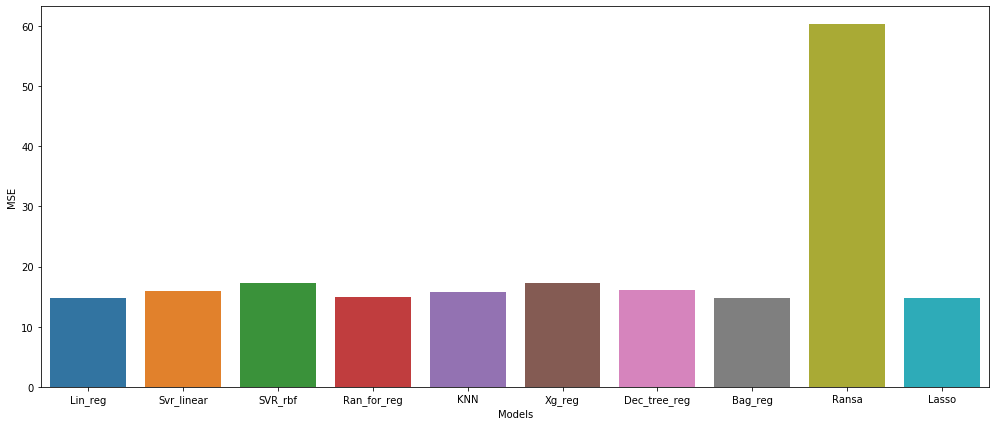

In [41]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "Models", y = "MSE", data = df_MSE)
ax.set(ylabel = "MSE")

In [42]:
# Model with the smalest error
print(f"The model with the smallest Mean_square_error is {min(MSE, key=MSE.get)} and it's error is {MSE[min(MSE, key=MSE.get)]}")

The model with the smallest Mean_square_error is Bag_reg and it's error is 2478598.8759294455


In [43]:
# Lets see the results of models of MAE
df_MAE = pd.DataFrame({'Models': list(MAE.keys()),
                          'MAE': list(MAE.values())})
df_MAE

,Models,MAE
0,Lin_reg,1.353348e+03
1,Svr_linear,2.471195e+03
2,SVR_rbf,3.560708e+03
3,Ran_for_reg,1.122707e+03
4,KNN,2.166730e+03
5,Xg_reg,4.536282e+03
6,Dec_tree_reg,1.486833e+03
7,Bag_reg,1.035422e+03
8,Ransa,2.606330e+12
9,Lasso,1.356342e+03


In [44]:
# Model with the smalest error
print(f"The model with the smallest Mean_absolut_error is {min(MAE, key=MAE.get)} and it's error is {MAE[min(MAE, key=MAE.get)]}")

The model with the smallest Mean_absolut_error is Bag_reg and it's error is 1035.4218285714285


In [45]:
for c in [c for c in df_MAE.columns if np.issubdtype(df_MAE[c].dtype , np.number)]:
    df_MAE[c] = np.log(df_MAE[c])

[Text(0, 0.5, 'MAE')]

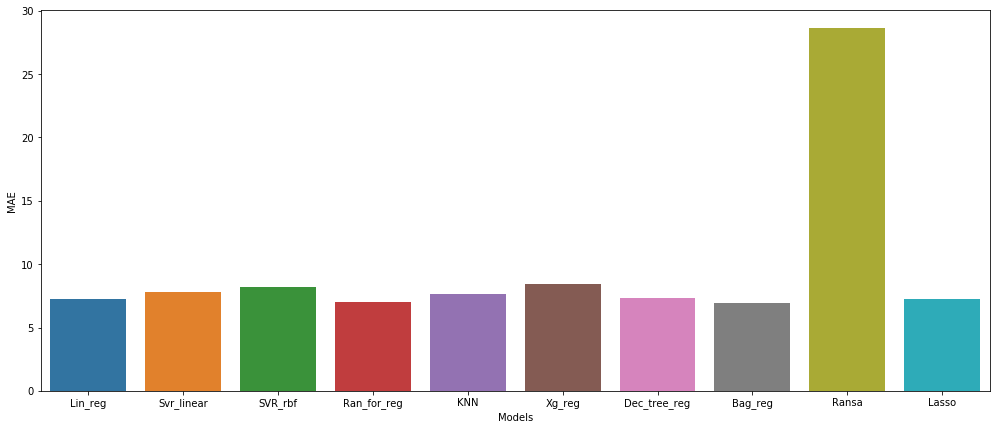

In [46]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "Models", y = "MAE", data = df_MAE)
ax.set(ylabel = "MAE")

In [47]:
y_pred_best=Bag_reg.predict(X_test)

In [48]:
# At the end let see how good is our prediction
df_check = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred_best})
df_check.head(5)

,Actual,Predicted
52,6795.0,6166.6000
181,15750.0,16469.1000
5,15250.0,17102.2167
18,5151.0,6466.1500
188,9995.0,9417.0000


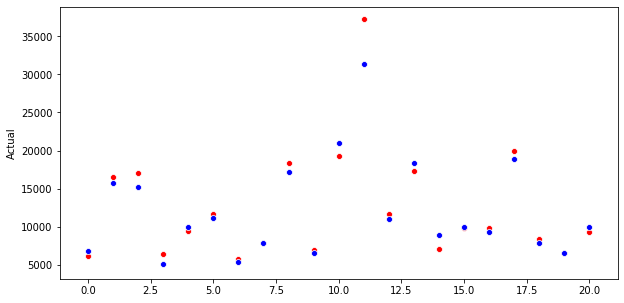

In [49]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x=range(len(df_check)), y="Predicted", color='red',data=df_check)
ax = sns.scatterplot(x=range(len(df_check)), y="Actual", color='blue',data=df_check)

Let's see our models with std data

In [50]:
# Create a dictionary for each error where you will save the results
MSE_std = {}
MAE_std= {}
RMSE_std={}
R2_std={}

In [51]:
# Create a funcion to iterate trough model

def models_std(model, X_train, y_train, X_test, y_test, model_name):
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    MSE_std[model_name] = mean_squared_error(y_test, y_pred)
    print(f"Mean_squared_str_error of {model_name}: {MSE_std[model_name]}\n")
    RMSE_std[model_name]=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print(f'RMSE_std of {model_name}: {RMSE_std[model_name]}\n')
    MAE_std[model_name]=mean_absolute_error(y_test,y_pred)              
    print(f'Mean_absolute_std_error of {model_name}: {MAE_std[model_name]}\n')
    R2_std[model_name]=r2_score(y_test, y_pred)
    print(f'R2_std score of {model_name}: {R2_std[model_name]}\n')
    return model, y_pred

In [52]:
# First model  std LinearRegression
from sklearn.linear_model import LinearRegression

Lin_reg = LinearRegression()
model1 = models_std(Lin_reg, X_train_std, y_train, X_test_std, y_test, 'Lin_reg')

Mean_squared_str_error of Lin_reg: 7.343251110986109e+29

RMSE_std of Lin_reg: 856927716379048.5

Mean_absolute_std_error of Lin_reg: 186996958354279.38

R2_std score of Lin_reg: -1.8382467989261643e+22



In [53]:
# Second model SVC kernel linear
from sklearn.svm import SVR, LinearSVR

Svr_linear = SVR(kernel='linear', C=1)
model2 = models_std(Svr_linear, X_train_std, y_train, X_test_std, y_test, 'Svr_linear')

Mean_squared_str_error of Svr_linear: 28999239.077192914

RMSE_std of Svr_linear: 5385.094156762063

Mean_absolute_std_error of Svr_linear: 3531.5850942881184

R2_std score of Svr_linear: 0.27405780356344334



In [54]:
# Third model SVR_rbf

SVR_rbf = SVR(kernel='rbf', C=100)
model3 = models_std(SVR_rbf, X_train_std, y_train, X_test_std, y_test, 'SVR_rbf')

Mean_squared_str_error of SVR_rbf: 29307900.018188454

RMSE_std of SVR_rbf: 5413.6771254100895

Mean_absolute_std_error of SVR_rbf: 3560.707726821511

R2_std score of SVR_rbf: 0.2663310490488153



In [55]:
# Forth model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

Ran_for_reg = RandomForestRegressor(random_state=0)
model4 = models_std(Ran_for_reg, X_train_std, y_train, X_test_std, y_test, 'Ran_for_reg')

Mean_squared_str_error of Ran_for_reg: 3293290.464614112

RMSE_std of Ran_for_reg: 1814.7425339739277

Mean_absolute_std_error of Ran_for_reg: 1115.923842222222

R2_std score of Ran_for_reg: 0.9175585777605528



In [56]:
# Fifth model KNN
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
model4 = models_std(KNN, X_train_std, y_train, X_test_std, y_test, 'KNN')

Mean_squared_str_error of KNN: 4844044.841428573

RMSE_std of KNN: 2200.9190901595116

Mean_absolute_std_error of KNN: 1500.7476190476193

R2_std score of KNN: 0.8787383164619151



In [57]:
# 6th XGBoostRegressor
import xgboost as xgb

Xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, random_state=0)
model5 = models_std(Xg_reg, X_train_std, y_train, X_test_std, y_test, 'Xg_reg')

Mean_squared_str_error of Xg_reg: 31878402.9055431

RMSE_std of Xg_reg: 5646.096253655538

Mean_absolute_std_error of Xg_reg: 4536.282180059524

R2_std score of Xg_reg: 0.20198327402528626



In [58]:
# 7th model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

Dec_tree_reg = DecisionTreeRegressor(random_state=0)
model7= models_std(Dec_tree_reg, X_train_std, y_train, X_test_std, y_test, 'Dec_tree_reg')

Mean_squared_str_error of Dec_tree_reg: 10445111.797619049

RMSE_std of Dec_tree_reg: 3231.889818298119

Mean_absolute_std_error of Dec_tree_reg: 1436.2142857142858

R2_std score of Dec_tree_reg: 0.7385259875197063



In [59]:
# 8th model BaggingRegressor
from sklearn.ensemble import BaggingRegressor

Bag_reg = BaggingRegressor( random_state=0)
model8= models_std(Bag_reg, X_train_std, y_train, X_test_std, y_test, 'Bag_reg')

Mean_squared_str_error of Bag_reg: 2556464.4559294456

RMSE_std of Bag_reg: 1598.894760742384

Mean_absolute_std_error of Bag_reg: 1065.4789714285712

R2_std score of Bag_reg: 0.9360036510851425



In [60]:
#9th model RANSACRegressor
from sklearn.linear_model import RANSACRegressor

Ransa = RANSACRegressor(random_state=0)

model9= models_std(Ransa, X_train_std, y_train, X_test_std, y_test, 'Ransa')

Mean_squared_str_error of Ransa: 1.7150339106412135e+31

RMSE_std of Ransa: 4141296790428348.0

Mean_absolute_std_error of Ransa: 1020127315796838.6

R2_std score of Ransa: -4.293269491451e+23



In [61]:
#10th model lasso
from sklearn.linear_model import Lasso

Lasso = Lasso(random_state=0, alpha=0.01)
model10= models_std(Lasso, X_train_std, y_train, X_test_std, y_test, 'Lasso')

Mean_squared_str_error of Lasso: 2814495.5779735358

RMSE_std of Lasso: 1677.645844024756

Mean_absolute_std_error of Lasso: 1353.5753404326365

R2_std score of Lasso: 0.9295443202390102



In [62]:
# Lets see the results of models of MSE
df_MSE_std = pd.DataFrame({'Models': list(MSE_std.keys()),
                          'MSE_std': list(MSE_std.values())})
df_MSE_std

,Models,MSE_std
0,Lin_reg,7.343251e+29
1,Svr_linear,2.899924e+07
2,SVR_rbf,2.930790e+07
3,Ran_for_reg,3.293290e+06
4,KNN,4.844045e+06
5,Xg_reg,3.187840e+07
6,Dec_tree_reg,1.044511e+07
7,Bag_reg,2.556464e+06
8,Ransa,1.715034e+31
9,Lasso,2.814496e+06


In [63]:
# Model with the smalest error
print(f"The model with the smallest Mean_square_std_error is {min(MSE_std, key=MSE_std.get)} and it's error is {MSE_std[min(MSE_std, key=MSE_std.get)]}")

The model with the smallest Mean_square_std_error is Bag_reg and it's error is 2556464.4559294456


In [64]:
for c in [c for c in df_MSE_std.columns if np.issubdtype(df_MSE_std[c].dtype , np.number)]:
    df_MSE_std[c] = np.log(df_MSE_std[c])

[Text(0, 0.5, 'MSE_std')]

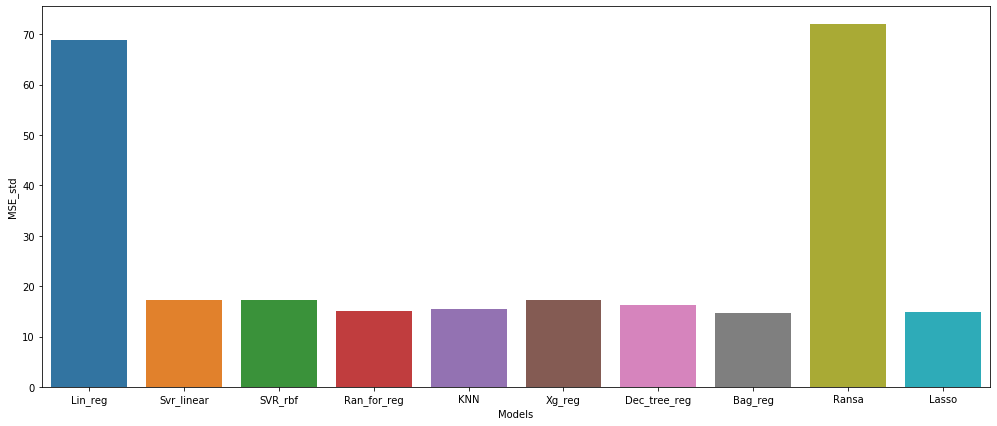

In [65]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "Models", y = "MSE_std", data = df_MSE_std)
ax.set(ylabel = "MSE_std")

In [66]:
# Lets see the results of models of MAE
df_MAE_std = pd.DataFrame({'Models': list(MAE_std.keys()),
                          'MAE_std': list(MAE_std.values())})
df_MAE_std

,Models,MAE_std
0,Lin_reg,1.869970e+14
1,Svr_linear,3.531585e+03
2,SVR_rbf,3.560708e+03
3,Ran_for_reg,1.115924e+03
4,KNN,1.500748e+03
5,Xg_reg,4.536282e+03
6,Dec_tree_reg,1.436214e+03
7,Bag_reg,1.065479e+03
8,Ransa,1.020127e+15
9,Lasso,1.353575e+03


In [67]:
# Model with the smalest error
print(f"The model with the smallest Mean_absolut_std_error is {min(MAE_std, key=MAE_std.get)} and it's error is {MAE_std[min(MAE_std, key=MAE_std.get)]}")

The model with the smallest Mean_absolut_std_error is Bag_reg and it's error is 1065.4789714285712


In [68]:
for c in [c for c in df_MAE_std.columns if np.issubdtype(df_MAE_std[c].dtype , np.number)]:
    df_MAE_std[c] = np.log(df_MAE_std[c])

[Text(0, 0.5, 'MAE_std')]

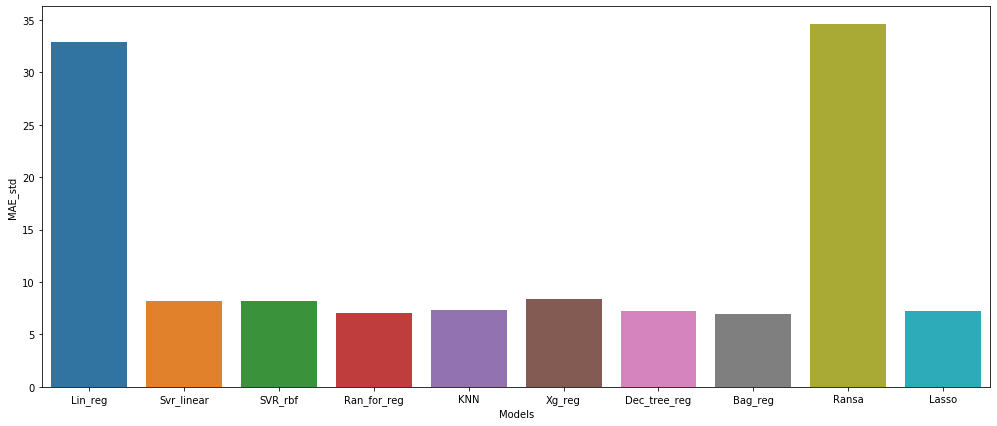

In [69]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "Models", y = "MAE_std", data = df_MAE_std)
ax.set(ylabel = "MAE_std")

In [70]:
y_pred_best_std=Bag_reg.predict(X_test_std)

In [71]:
# At the end let see how good is our prediction
df_check_std = pd.DataFrame({'Actual': y_test, 'Predicted_std': y_pred_best_std})
df_check_std.head(5)

,Actual,Predicted_std
52,6795.0,6166.6000
181,15750.0,16469.1000
5,15250.0,17102.2167
18,5151.0,6466.1500
188,9995.0,9384.0000


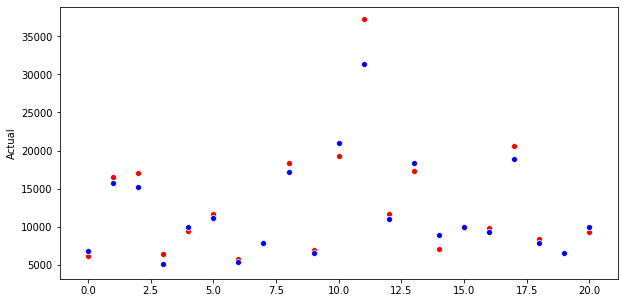

In [72]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x=range(len(df_check)), y="Predicted_std", color='red',data=df_check_std)
ax = sns.scatterplot(x=range(len(df_check)), y="Actual", color='blue',data=df_check_std)

Let's see how normalization will go

In [73]:
MSE_norm = {}
MAE_norm = {}
RMSE_norm ={}
R2_norm={}

In [74]:
# Define function to go through normalized data 
def models_norm(model, X_train, y_train, X_test, y_test, model_name):
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    MSE_norm[model_name] = mean_squared_error(y_test, y_pred)
    print(f"Mean_squared_norm_error of {model_name}: {MSE_norm[model_name]}\n")
    RMSE_norm[model_name]=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print(f'RMSE_norm of {model_name}: {RMSE_norm[model_name]}\n')
    MAE_norm[model_name]=mean_absolute_error(y_test,y_pred)              
    print(f'Mean_absolute_norm_error of {model_name}: {MAE_norm[model_name]}\n')
    R2_norm[model_name]=r2_score(y_test, y_pred)
    print(f'R2_norm score of {model_name}: {R2_norm[model_name]}\n')
    return model, y_pred

In [75]:
# First model LinearRegression
from sklearn.linear_model import LinearRegression

Lin_reg = LinearRegression()
model1 = models_norm(Lin_reg, X_train_norm, y_train, X_test_norm, y_test, 'Lin_reg')

Mean_squared_norm_error of Lin_reg: 2.9070767751502434e+30

RMSE_norm of Lin_reg: 1705015183260912.5

Mean_absolute_norm_error of Lin_reg: 372064816112850.5

R2_norm score of Lin_reg: -7.277327842101954e+22



In [76]:
# Second model SVC kernel linear
from sklearn.svm import SVR, LinearSVR

Svr_linear = SVR(kernel='linear', C=1)
model2 = models_norm(Svr_linear, X_train_norm, y_train, X_test_norm, y_test, 'Svr_linear')

Mean_squared_norm_error of Svr_linear: 40752378.91241697

RMSE_norm of Svr_linear: 6383.758995483537

Mean_absolute_norm_error of Svr_linear: 4479.1668003191835

R2_norm score of Svr_linear: -0.02016026623821565



In [77]:
# Third model SVR_rbf

SVR_rbf = SVR(kernel='rbf', C=100)
model3 = models_norm(SVR_rbf, X_train_norm, y_train, X_test_norm, y_test, 'SVR_rbf')

Mean_squared_norm_error of SVR_rbf: 26165976.859505698

RMSE_norm of SVR_rbf: 5115.268991901178

Mean_absolute_norm_error of SVR_rbf: 3273.432531005184

R2_norm score of SVR_rbf: 0.3449832713632578



In [78]:
# Forth model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

Ran_for_reg = RandomForestRegressor(random_state=0)
model4 = models_norm(Ran_for_reg, X_train_norm, y_train, X_test_norm, y_test, 'Ran_for_reg')

Mean_squared_norm_error of Ran_for_reg: 3297142.6046218574

RMSE_norm of Ran_for_reg: 1815.803569944133

Mean_absolute_norm_error of Ran_for_reg: 1121.3771755555551

R2_norm score of Ran_for_reg: 0.9174621465759014



In [79]:
# Fifth model KNN
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
model4 = models_norm(KNN, X_train_norm, y_train, X_test_norm, y_test, 'KNN')

Mean_squared_norm_error of KNN: 2511550.7633333327

RMSE_norm of KNN: 1584.7872927725452

Mean_absolute_norm_error of KNN: 1156.3000000000002

R2_norm score of KNN: 0.937127982125916



In [80]:
# 6th XGBoostRegressor
import xgboost as xgb

Xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10,random_state=0)
model5 = models_norm(Xg_reg, X_train_norm, y_train, X_test_norm, y_test, 'Xg_reg')

Mean_squared_norm_error of Xg_reg: 31878402.9055431

RMSE_norm of Xg_reg: 5646.096253655538

Mean_absolute_norm_error of Xg_reg: 4536.282180059524

R2_norm score of Xg_reg: 0.20198327402528626



In [81]:
# 7th model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

Dec_tree_reg = DecisionTreeRegressor(random_state=0)
model7= models_norm(Dec_tree_reg, X_train_norm, y_train, X_test_norm, y_test, 'Dec_tree_reg')

Mean_squared_norm_error of Dec_tree_reg: 10529291.273809524

RMSE_norm of Dec_tree_reg: 3244.8869431475614

Mean_absolute_norm_error of Dec_tree_reg: 1486.8333333333333

R2_norm score of Dec_tree_reg: 0.7364187103708844



In [82]:
# 8th model BaggingRegressor
from sklearn.ensemble import BaggingRegressor

Bag_reg = BaggingRegressor(random_state=0)
model8= models_norm(Bag_reg, X_train_norm, y_train, X_test_norm, y_test, 'Bag_reg')

Mean_squared_norm_error of Bag_reg: 2557668.7513675406

RMSE_norm of Bag_reg: 1599.2713188722983

Mean_absolute_norm_error of Bag_reg: 1065.3027809523808

R2_norm score of Bag_reg: 0.935973503781168



In [83]:
#9th model RANSACRegressor
from sklearn.linear_model import RANSACRegressor

Ransa = RANSACRegressor(random_state=0)
model9= models_norm(Ransa, X_train_norm, y_train, X_test_norm, y_test, 'Ransa')

Mean_squared_norm_error of Ransa: 1.9781652239506211e+31

RMSE_norm of Ransa: 4447656938153640.0

Mean_absolute_norm_error of Ransa: 1046604056270866.2

R2_norm score of Ransa: -4.9519699595101683e+23



In [84]:
#10th model lasso
from sklearn.linear_model import Lasso

Lasso = Lasso(random_state=0)
model10= models_norm(Lasso, X_train_norm, y_train, X_test_norm, y_test, 'Lasso')

Mean_squared_norm_error of Lasso: 2794305.7955177524

RMSE_norm of Lasso: 1671.6177181155242

Mean_absolute_norm_error of Lasso: 1368.1121417233146

R2_norm score of Lasso: 0.9300497340184033



In [85]:
# Lets see the results of models of MSE
df_MSE_norm= pd.DataFrame({'Models': list(MSE_norm.keys()),
                          'MSE_norm': list(MSE_norm.values())})
df_MSE_norm

,Models,MSE_norm
0,Lin_reg,2.907077e+30
1,Svr_linear,4.075238e+07
2,SVR_rbf,2.616598e+07
3,Ran_for_reg,3.297143e+06
4,KNN,2.511551e+06
5,Xg_reg,3.187840e+07
6,Dec_tree_reg,1.052929e+07
7,Bag_reg,2.557669e+06
8,Ransa,1.978165e+31
9,Lasso,2.794306e+06


In [86]:
# Model with the smalest error
print(f"The model with the smallest Mean_square_norm_error is {min(MSE_norm, key=MSE_norm.get)} and it's error is {MSE_norm[min(MSE_norm, key=MSE_norm.get)]}")

The model with the smallest Mean_square_norm_error is KNN and it's error is 2511550.7633333327


In [87]:
for c in [c for c in df_MSE_norm.columns if np.issubdtype(df_MSE_norm[c].dtype , np.number)]:
    df_MSE_norm[c] = np.log(df_MSE_norm[c])

[Text(0, 0.5, 'MSE_norm')]

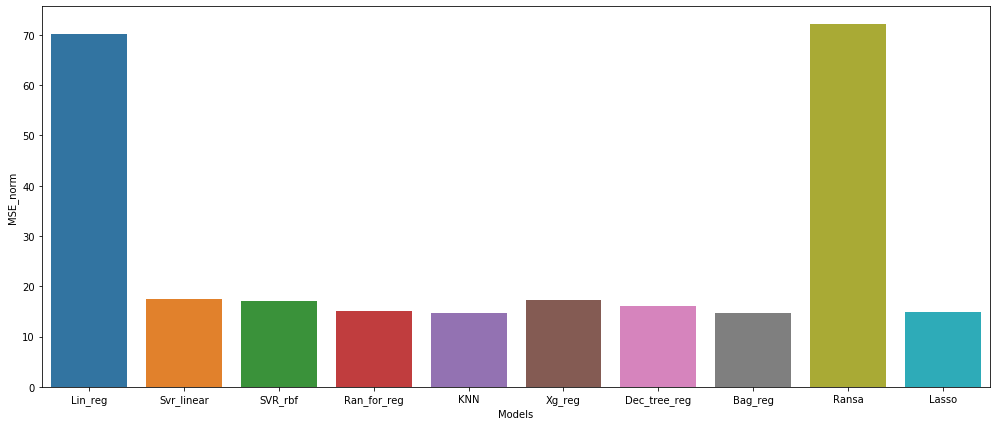

In [88]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "Models", y = "MSE_norm", data = df_MSE_norm)
ax.set(ylabel = "MSE_norm")

In [89]:
# Lets see the results of models of MAE
df_MAE_norm= pd.DataFrame({'Models': list(MAE_norm.keys()),
                          'MAE_norm': list(MAE_norm.values())})
df_MAE_norm

,Models,MAE_norm
0,Lin_reg,3.720648e+14
1,Svr_linear,4.479167e+03
2,SVR_rbf,3.273433e+03
3,Ran_for_reg,1.121377e+03
4,KNN,1.156300e+03
5,Xg_reg,4.536282e+03
6,Dec_tree_reg,1.486833e+03
7,Bag_reg,1.065303e+03
8,Ransa,1.046604e+15
9,Lasso,1.368112e+03


In [90]:
# Model with the smalest error
print(f"The model with the smallest Mean_absolut_norm_error is {min(MAE_norm, key=MAE_norm.get)} and it's error is {MAE_norm[min(MAE_norm, key=MAE_norm.get)]}")

The model with the smallest Mean_absolut_norm_error is Bag_reg and it's error is 1065.3027809523808


In [91]:
for c in [c for c in df_MAE_norm.columns if np.issubdtype(df_MAE_norm[c].dtype , np.number)]:
    df_MAE_norm[c] = np.log(df_MAE_norm[c])

[Text(0, 0.5, 'MAE_norm')]

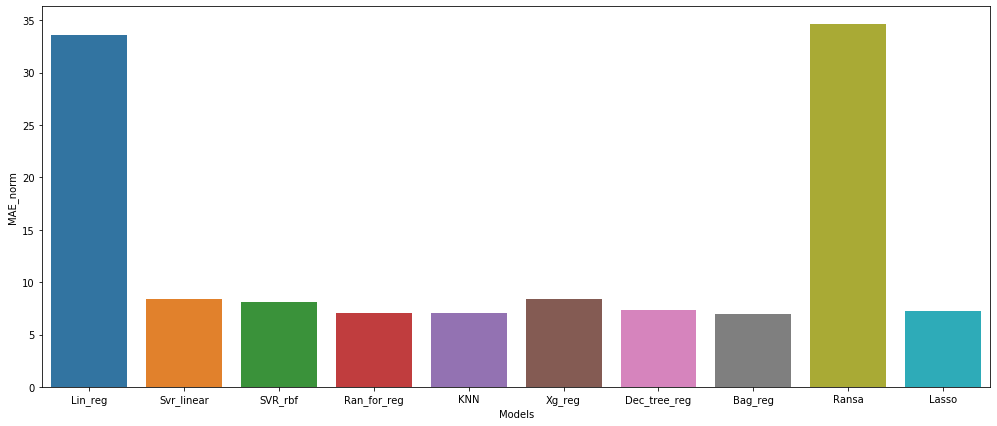

In [92]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "Models", y = "MAE_norm", data = df_MAE_norm)
ax.set(ylabel = "MAE_norm")

In [93]:
y_pred_best_norm= Bag_reg.predict(X_test_norm)

In [94]:
# At the end let see how good is our prediction
df_check_norm = pd.DataFrame({'Actual': y_test, 'Predicted_norm': y_pred_best_norm})
df_check_norm.head(5)

,Actual,Predicted_norm
52,6795.0,6166.6000
181,15750.0,16469.1000
5,15250.0,17115.2167
18,5151.0,6466.1500
188,9995.0,9417.0000


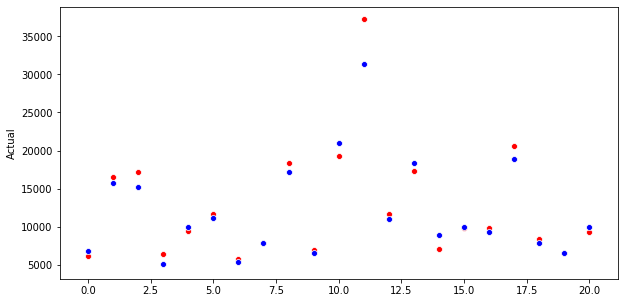

In [95]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x=range(len(df_check)), y="Predicted_norm", color='red',data=df_check_norm)
ax = sns.scatterplot(x=range(len(df_check)), y="Actual", color='blue',data=df_check_norm)


In [96]:
# Importing MAE error from privious notebook, MAE on basic data
MAEerrors=pd.read_csv('MAE_errors.tsv',  sep='\t')
MAEerrors.index = ['MAE', 'MAE_std', 'MAE_norm']
MAEerrors

,Lin_reg,Svr_linear,SVR_rbf,Ran_for_reg,KNN,Xg_reg,Dec_tree_reg,Bag_reg,Ransa,Lasso
MAE,1.725550e+03,2260.026165,4472.329336,1365.313810,1689.587305,4327.840355,1560.547619,1061.646824,3.165145e+03,1810.468731
MAE_std,1.442838e+15,3531.751951,4107.464836,1371.651429,2055.023810,4327.840355,1560.547619,1058.494443,2.346034e+15,1733.686853
MAE_norm,2.257767e+14,4526.559446,3933.180773,1366.838572,2254.671429,4327.840355,1560.547619,1091.003967,9.970154e+14,1823.777892


In [97]:
# Same here for R2 score
R2errors=pd.read_csv('R2_errors.tsv',  sep='\t')
R2errors.index = ['R2', 'R2_std', 'R2_norm']
R2errors

,Lin_reg,Svr_linear,SVR_rbf,Ran_for_reg,KNN,Xg_reg,Dec_tree_reg,Bag_reg,Ransa,Lasso
R2,8.386375e-01,0.822006,-0.009248,0.900750,0.862038,0.298388,0.732652,0.934797,-2.074839e-01,0.821717
R2_std,-9.688913e+23,0.290894,0.131343,0.901521,0.753319,0.298388,0.732652,0.934945,-2.253929e+24,0.841089
R2_norm,-1.625365e+22,-0.022082,0.179852,0.900516,0.688062,0.298388,0.732652,0.933417,-3.077258e+23,0.810627


In [98]:
# Making new Df of all MAE from this notebook
mydictsMAE2 = [MAE, MAE_std, MAE_norm]
MAEerrors2= pd.DataFrame.from_records(mydictsMAE2)
MAEerrors2.index = ['MAE2', 'MAE_std2', 'MAE_norm2']
MAEerrors2

,Lin_reg,Svr_linear,SVR_rbf,Ran_for_reg,KNN,Xg_reg,Dec_tree_reg,Bag_reg,Ransa,Lasso
MAE2,1.353348e+03,2471.194555,3560.707727,1122.707176,2166.730162,4536.28218,1486.833333,1035.421829,2.606330e+12,1356.341892
MAE_std2,1.869970e+14,3531.585094,3560.707727,1115.923842,1500.747619,4536.28218,1436.214286,1065.478971,1.020127e+15,1353.575340
MAE_norm2,3.720648e+14,4479.166800,3273.432531,1121.377176,1156.300000,4536.28218,1486.833333,1065.302781,1.046604e+15,1368.112142


In [99]:
#Making new Df of all R2 from this notebook
R2mydicts = [R2, R2_std, R2_norm]

R2errors2= pd.DataFrame.from_records(R2mydicts)
R2errors2.index = ['R2_2', 'R2_std2', 'R2_norm2' ]
R2errors2

,Lin_reg,Svr_linear,SVR_rbf,Ran_for_reg,KNN,Xg_reg,Dec_tree_reg,Bag_reg,Ransa,Lasso
R2_2,9.295876e-01,0.781943,0.266331,0.917434,0.808481,0.201983,0.736419,0.937953,-3.571031e+18,0.929613
R2_std2,-1.838247e+22,0.274058,0.266331,0.917559,0.878738,0.201983,0.738526,0.936004,-4.293269e+23,0.929544
R2_norm2,-7.277328e+22,-0.020160,0.344983,0.917462,0.937128,0.201983,0.736419,0.935974,-4.951970e+23,0.930050


In [100]:
# Now let's build df of all MAE
ErrorsMAE=pd.concat([MAEerrors,MAEerrors2])
ErrorsMAE

,Lin_reg,Svr_linear,SVR_rbf,Ran_for_reg,KNN,Xg_reg,Dec_tree_reg,Bag_reg,Ransa,Lasso
MAE,1.725550e+03,2260.026165,4472.329336,1365.313810,1689.587305,4327.840355,1560.547619,1061.646824,3.165145e+03,1810.468731
MAE_std,1.442838e+15,3531.751951,4107.464836,1371.651429,2055.023810,4327.840355,1560.547619,1058.494443,2.346034e+15,1733.686853
MAE_norm,2.257767e+14,4526.559446,3933.180773,1366.838572,2254.671429,4327.840355,1560.547619,1091.003967,9.970154e+14,1823.777892
MAE2,1.353348e+03,2471.194555,3560.707727,1122.707176,2166.730162,4536.282180,1486.833333,1035.421829,2.606330e+12,1356.341892
MAE_std2,1.869970e+14,3531.585094,3560.707727,1115.923842,1500.747619,4536.282180,1436.214286,1065.478971,1.020127e+15,1353.575340
MAE_norm2,3.720648e+14,4479.166800,3273.432531,1121.377176,1156.300000,4536.282180,1486.833333,1065.302781,1.046604e+15,1368.112142


In [101]:
# Let's explore the results
a1=ErrorsMAE.idxmin()

In [102]:
a2=ErrorsMAE.min()
a2.sort_values(ascending=True)

Bag_reg         1035.421829
Ran_for_reg     1115.923842
KNN             1156.300000
Lin_reg         1353.348214
Lasso           1353.575340
Dec_tree_reg    1436.214286
Svr_linear      2260.026165
Ransa           3165.145456
SVR_rbf         3273.432531
Xg_reg          4327.840355
dtype: float64

In [ ]:
# As we can see the smallest MAE has Bag_reg

In [103]:
dfminMAE= pd.DataFrame({'MAE_score': a1, 'MAE_min': a2}).reset_index()

dfminMAE_tidy = dfminMAE.rename(columns = {'index': 'Model'}, inplace = False)
dfminMAE_tidy

,Model,MAE_score,MAE_min
0,Lin_reg,MAE2,1353.348214
1,Svr_linear,MAE,2260.026165
2,SVR_rbf,MAE_norm2,3273.432531
3,Ran_for_reg,MAE_std2,1115.923842
4,KNN,MAE_norm2,1156.300000
5,Xg_reg,MAE,4327.840355
6,Dec_tree_reg,MAE_std2,1436.214286
7,Bag_reg,MAE2,1035.421829
8,Ransa,MAE,3165.145456
9,Lasso,MAE_std2,1353.575340


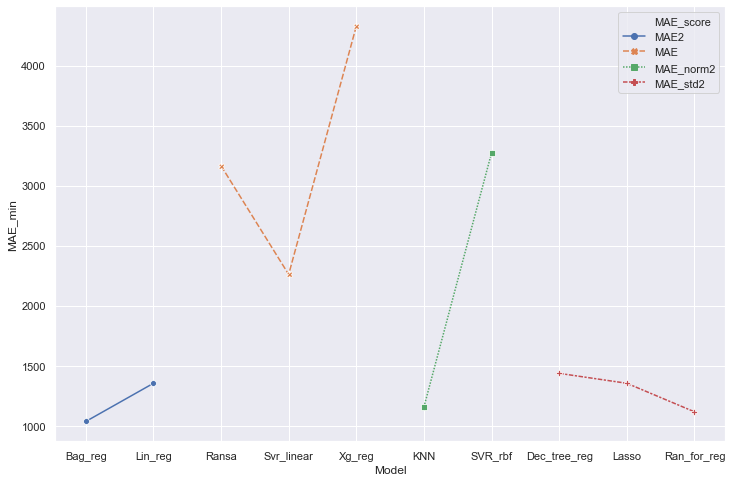

In [104]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.lineplot(x='Model', y='MAE_min', ci=None,style = 'MAE_score' ,hue = 'MAE_score', data = dfminMAE_tidy, markers=True)


In [105]:
# Building dataframe for all R2 errors
ErrorsR2=pd.concat([R2errors,R2errors2 ])
ErrorsR2

,Lin_reg,Svr_linear,SVR_rbf,Ran_for_reg,KNN,Xg_reg,Dec_tree_reg,Bag_reg,Ransa,Lasso
R2,8.386375e-01,0.822006,-0.009248,0.900750,0.862038,0.298388,0.732652,0.934797,-2.074839e-01,0.821717
R2_std,-9.688913e+23,0.290894,0.131343,0.901521,0.753319,0.298388,0.732652,0.934945,-2.253929e+24,0.841089
R2_norm,-1.625365e+22,-0.022082,0.179852,0.900516,0.688062,0.298388,0.732652,0.933417,-3.077258e+23,0.810627
R2_2,9.295876e-01,0.781943,0.266331,0.917434,0.808481,0.201983,0.736419,0.937953,-3.571031e+18,0.929613
R2_std2,-1.838247e+22,0.274058,0.266331,0.917559,0.878738,0.201983,0.738526,0.936004,-4.293269e+23,0.929544
R2_norm2,-7.277328e+22,-0.020160,0.344983,0.917462,0.937128,0.201983,0.736419,0.935974,-4.951970e+23,0.930050


In [106]:
# Let's compare values
s1=ErrorsR2.idxmax()
s2=ErrorsR2.max()
s2.sort_values(ascending=False)

Bag_reg         0.937953
KNN             0.937128
Lasso           0.930050
Lin_reg         0.929588
Ran_for_reg     0.917559
Svr_linear      0.822006
Dec_tree_reg    0.738526
SVR_rbf         0.344983
Xg_reg          0.298388
Ransa          -0.207484
dtype: float64

In [107]:
dfmaxr2= pd.DataFrame({'R2_score': s1, 'R2_max': s2}).reset_index()

dfmaxr2_tidy = dfmaxr2.rename(columns = {'index': 'Model'}, inplace = False)
dfmaxr2_tidy

,Model,R2_score,R2_max
0,Lin_reg,R2_2,0.929588
1,Svr_linear,R2,0.822006
2,SVR_rbf,R2_norm2,0.344983
3,Ran_for_reg,R2_std2,0.917559
4,KNN,R2_norm2,0.937128
5,Xg_reg,R2,0.298388
6,Dec_tree_reg,R2_std2,0.738526
7,Bag_reg,R2_2,0.937953
8,Ransa,R2,-0.207484
9,Lasso,R2_norm2,0.930050


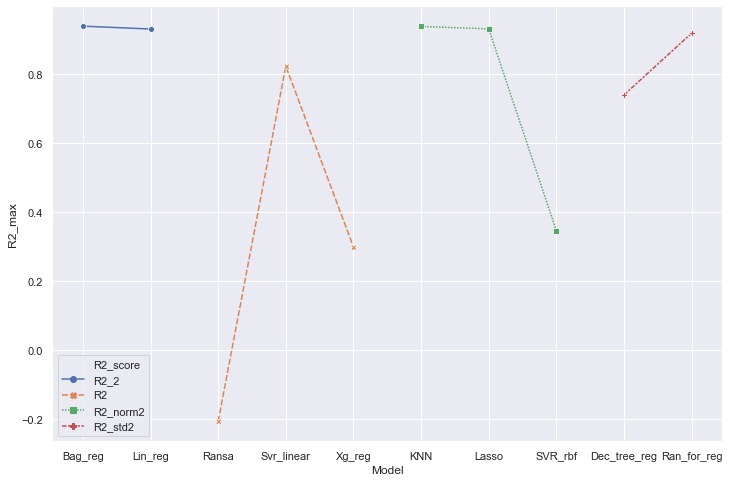

In [108]:
# increase the size
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.lineplot(x='Model', y='R2_max', ci=None,style = 'R2_score' ,hue = 'R2_score', data = dfmaxr2_tidy, markers=True)


As Bagging Regressor and KNN has the smallest MAE and R2 score closest to 1, on data without any transformation, and KNN on normalized data. We will try to set the parameters of Bagging Regressor, and later for KNN, hoping that this will improve our score for little bit.

In [109]:
# Let first see our try our model and see the score one more time
Bag_reg_test = BaggingRegressor(random_state=0)
Bag_reg_test.fit(X_train,y_train)
y_pred=Bag_reg_test.predict(X_test)
R2Score=r2_score(y_test,y_pred)
print(R2Score)

0.9379528715464636


In [110]:
# Let's apply GreadSearch
from sklearn.model_selection import GridSearchCV

params_bag_GS = {"n_estimators": [50,100,200],
              "max_features":[1,2,4,6,8],
              "max_samples": [0.5,0.1],
            "bootstrap": [True, False],
         "bootstrap_features": [True, False]}

In [111]:
# Fitting the model and chosing the best parameters
Bag_model_GS = GridSearchCV(Bag_reg, param_grid=params_bag_GS)
Bag_model_GS.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [1, 2, 4, 6, 8],
                         'max_samples': [0.5, 0.1],
                         'n_estimators': [50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [112]:
# These are our results
Bag_model_GS.best_params_

{'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 8,
 'max_samples': 0.5,
 'n_estimators': 200}

In [113]:
# Using Gread Search best parameters, let see our R2 score

Bag_reg_GS = BaggingRegressor(bootstrap = False,
 bootstrap_features = False,
 max_features = 8,
 max_samples = 0.5,
 n_estimators = 200)
Bag_reg_GS.fit(X_train,y_train)
y_pred =Bag_reg_GS.predict(X_test)
R2Score=r2_score(y_test,y_pred)
print(R2Score)

0.9368966660493474


In [114]:
# As we can see, there is no any improvement of R2 score

# Random Search

In [115]:
#Let's try with Random Search

from sklearn.model_selection import RandomizedSearchCV
# Number estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300)]
# Number of features to consider at every split
max_features = [8,20]
# Maximum number of samples 
max_samples = [0.5,0.9]
# Method of selecting samples for training each tree
bootstrap = [True, False]
bootstrap_features = [True, False]
    
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
                'bootstrap_features': bootstrap_features,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 251, 253, 255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285, 287, 289, 291, 293, 295, 297, 300], 'max_features': [8, 20], 'max_samples': [0.5, 0.9], 'bootstrap_features': [True, False], 'bootstrap': [True, False]}


In [116]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
BagR = BaggingRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
BagR_random = RandomizedSearchCV(estimator=BagR, param_distributions=random_grid,
                              n_iter = 200, scoring='neg_mean_absolute_error',
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)
# Fit the random search model
BagR_random.fit(X_train_norm,y_train)

BagR_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.4min finished


{'n_estimators': 236,
 'max_samples': 0.9,
 'max_features': 20,
 'bootstrap_features': False,
 'bootstrap': True}

In [117]:
# Let us see will our score improve with new set of parameters
Bag_reg_RS = BaggingRegressor(bootstrap = False,
 bootstrap_features = False,
 max_features = 20,
 max_samples = 0.9,
 n_estimators = 236)
Bag_reg_RS.fit(X_train,y_train)
y_pred =Bag_reg_RS.predict(X_test)
R2Score=r2_score(y_test,y_pred)
print(R2Score)

0.8948136508610469


In [ ]:
# eaven worst, Grid search was better

In [118]:
#Let try to improve our model with ExtraTreeRegresor

from sklearn.tree import ExtraTreeRegressor
Extra_tree = ExtraTreeRegressor(random_state=0)
Bag_reg_extra_tree = BaggingRegressor(Extra_tree, random_state=0)
Bag_reg_extra_tree.fit(X_train,y_train)
y_predET=Bag_reg_extra_tree.predict(X_test)
R2Score=r2_score(y_test,y_predET)
print(R2Score)

0.9211498976509849


In [119]:
# Let's use Decision Tree
Bag_reg_dec = BaggingRegressor(Dec_tree_reg, random_state=0)
Bag_reg_dec.fit(X_train,y_train)
y_predDR=Bag_reg_dec.predict(X_test)
R2Score=r2_score(y_test,y_predDR)
print(R2Score)

0.9379528715464636


In [ ]:
# All scores are near, but there is no any improvement

In [120]:
# Maybe we will have more luck by improving KNN
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_norm,y_train)
        y_pred_knn=knn.predict(X_test_norm)
        scores[k] = metrics.r2_score(y_test,y_pred_knn)
        scores_list.append(metrics.r2_score(y_test,y_pred_knn))

In [121]:
#Testing R2 for each value of K
scores

{1: 0.9319861804535899,
 2: 0.9387509631436013,
 3: 0.9093267451020003,
 4: 0.9178006856390063,
 5: 0.937127982125916,
 6: 0.9112563113901054,
 7: 0.9053272505965817,
 8: 0.9030108143283372,
 9: 0.9129027752376092,
 10: 0.9181204943646082,
 11: 0.9129213549908529,
 12: 0.906267930139503,
 13: 0.9042969411157095,
 14: 0.9183220521397182,
 15: 0.9217241335208142,
 16: 0.9259903088387569,
 17: 0.9248801665035629,
 18: 0.9170420187906704,
 19: 0.9149320803480658,
 20: 0.917025082854429,
 21: 0.9175957444252356,
 22: 0.9175968505661066,
 23: 0.9100339977749263,
 24: 0.9020411709371411,
 25: 0.8911242975714518}

Text(0, 0.5, 'Testing Accuracy')

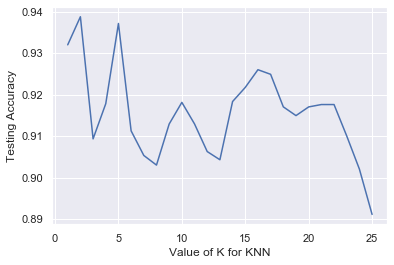

In [122]:
# the scope of our error is very small, let plot it
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [123]:
# we will try with 5 neigbors, fitting and predict
knn3 = KNeighborsRegressor(n_neighbors=5)
knn3.fit(X_train_norm,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [124]:
y_pred_knn3=knn3.predict(X_test_norm)

In [125]:
# let's print score
r2_score(y_test,y_pred_knn3)

0.937127982125916

In [ ]:
#Good result, but no improvement

In [126]:
#Let's try Hyperparameters

leaf_size = list(range(1,50))
n_neighbors = list(range(1,15))
p=[1,2]

In [127]:
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [128]:
knn_2 = KNeighborsRegressor()

In [129]:
# cross validation
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

In [130]:
# This will take sooooooome time (~2min)...
best_model = clf.fit(X_train_norm,y_train)

In [131]:
#Print hyperpameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 3
Best p: 1
Best n_neighbors: 3


In [132]:
# Now let's use it

y_predknn2 = best_model.predict(X_test_norm)

In [133]:
r2_score(y_test,y_predknn2)

0.9193284825748278

In [ ]:
# And no, we get worse result

In [ ]:
# we still have left to try feature inportance

In [162]:
#Since our top two best models doesn't have Feature importance in it, we will use feature permutation

In [149]:
feature_list = list(df_ml2.columns)

Feature: curbweight           Importance: 86582919.2502294
Feature: horsepower           Importance: 4778600.865936317
Feature: enginesize           Importance: 3905393.1685008095
Feature: x0_Affordable        Importance: 1784.7008780490607
Feature: price                Importance: 594.9002926830202
Feature: fueltype             Importance: 0.0
Feature: aspiration           Importance: 0.0
Feature: cylindernumber       Importance: 0.0
Feature: boreratio            Importance: 0.0
Feature: x0_Cheap             Importance: 0.0
Feature: x0_Expensive         Importance: 0.0
Feature: x0_Luxury            Importance: 0.0
Feature: x1_convertible       Importance: 0.0
Feature: x1_hardtop           Importance: 0.0
Feature: x1_hatchback         Importance: 0.0
Feature: x1_sedan             Importance: 0.0
Feature: x1_wagon             Importance: 0.0
Feature: x2_High risk         Importance: 0.0
Feature: x2_Low risk          Importance: 0.0
Feature: x2_No risk           Importance: 0.0
Feature: 

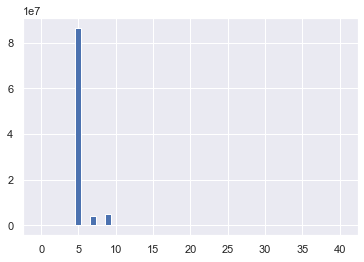

In [165]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

model = KNeighborsRegressor()
# fit the model
model.fit(X,y)
#perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# List of tuples with variable and importance
feature_importances = [(feature, importance) for feature, importance in zip(feature_list,importance)]
 
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [168]:
# Let's use only our top feature
knn_most_important = KNeighborsRegressor()

# Extract the two most important features
important_indices = [feature_list.index('curbweight'),feature_list.index('horsepower'), feature_list.index('enginesize'),
                    feature_list.index('x0_Affordable')]
train_important = X_train_norm[:, important_indices]
test_important = X_test_norm[:, important_indices]

# Train the random forest
knn_most_important.fit(train_important, y_train)
y_pred = knn_most_important.predict(test_important)

# Display the performance metrics
print('Mean Absolute Error:', mean_absolute_error(y_test,y_pred))
print('R2 score:', r2_score(y_test,y_pred))

Mean Absolute Error: 1669.9095238095238
R2 score: 0.8461942652180933


In [ ]:
# As we can see through all the ways to improve the model, we didn't make a better score of our error, we didn't reduce it significantly, 
# which tells us that we circling around in the right direction.
# Maybe sometimes, less work means better.
# Hence let try NN and fastai tabular and let's see what can be done with same data set in only few minutes.